## Submission :
* Make sure that the notebook runs without errors when cells are run in sequence.
* Write your name and roll number in the cell below.
* Rename the notebook to `<RollNumber>_Q2.ipynb` before submission.

Name: Sanchit Jalan

Roll Number: 2022101070

# Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that projects the data into a lower dimensional space. It does so by finding the directions of maximum variance in high-dimensional data and projecting it onto a smaller dimensional subspace while retaining most of the information.

PCA is done by finding the eigenvectors of the covariance matrix of the data and ordering them by their corresponding eigenvalues in descending order. 

The eigenvectors with the lowest eigenvalues carry the least information about the distribution of the data and hence can be dropped. The eigenvectors with the highest eigenvalues are the ones that contain the most information about the distribution of the data and hence are the ones that we want to keep.




(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

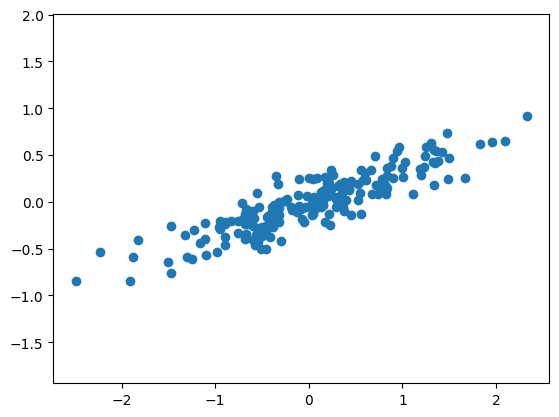

In [1]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

We observe that most of the variance is along one of the axes. 

In [2]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9497608386363474,
 1.0052301483776815)

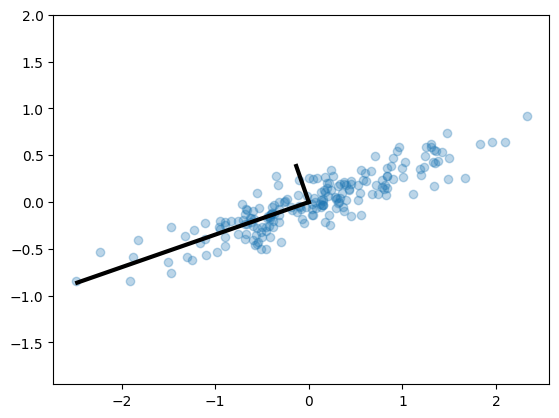

In [3]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal')


These vectors represent the principal components of the data. The eigenvalues are the variance of the data when projected onto that axis.  

In [4]:
X_pca = pca.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 2)


The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

(-2.729271205627197,
 2.5702744393352615,
 -0.9326181575178754,
 1.004413830229183)

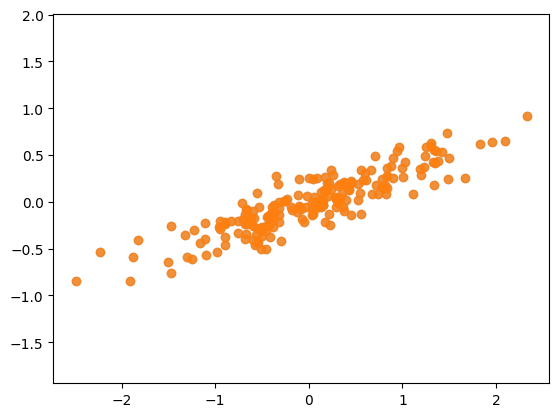

In [5]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')


Therefore, with PCA, we can reduce the dimensionality of the data while retaining most of the information. This is useful for data visualization and for reducing the computational complexity of the models in Machine Learning especially when the number of features is very large.

For the assignment, you will be using the digits dataset from sklearn. The dataset consists of 1797 images of handwritten digits. Each image is a 8x8 image which is flattened into a 64-dimensional vector. Therefore, each image is a 64-dimensional vector. Each feature represents the intensity of one pixel. The dataset has 10 classes, one for each digit.

In [6]:
from sklearn.datasets import load_digits
X = load_digits().data
X.shape

(1797, 64)

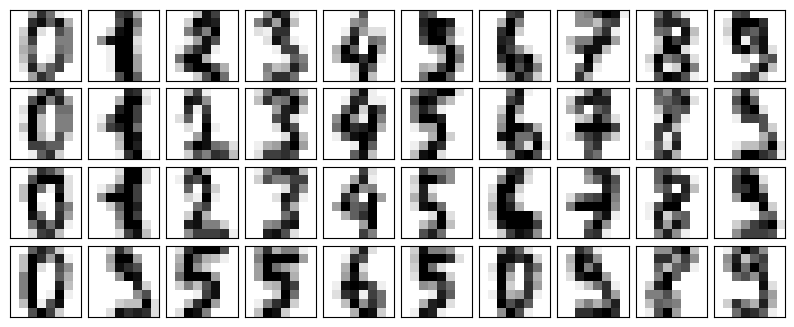

In [7]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
plot_digits(X)

### Q1. Write a function that returns the eigenvalues and eigenvectors given the data matrix X. Also, write a function that returns the top k principal components given the data matrix X and the number of principal components k. (Do not use PCA from sklearn, you can use any inbuilt function for finding the covariance matrix and the eigenspace, also mean center the data before performing PCA)

In [8]:
column_means = np.mean(X, axis=0)
meanX = X - column_means
def eigen(X):
    covariance_matrix=np.cov(X.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    # print(eigenvalues)
    # print("wtf\n")
    # print(eigenvectors)
    return eigenvalues,eigenvectors
def get_top_principal_components(X, k):
    eigenvalues,eigenvectors=eigen(X)
    index = np.argsort(eigenvalues)[::-1]
    sortedvectors = eigenvectors[:, index]
    top= sortedvectors[:, :k]
    return top

#assuming k to be 10 we could take input also
topcomponents=get_top_principal_components(meanX,10)



### Q2. Plot the percentage of variance vs principal components for the first 10 principal components. Plot the cumulative percentage of variance explained by the principal components. Choose the number of principal components such that 95% of the variance for the digits dataset is retained.

In [9]:
def plot_variance(X, k):
    cov_matrix = np.cov(X.T)
    eigenvalues, _ = np.linalg.eig(cov_matrix)
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    sum_eigenvalues = 0
    for eigenvalue in sorted_eigenvalues:
        sum_eigenvalues += eigenvalue
    var_exp = sorted_eigenvalues / sum_eigenvalues
    for i in range(len(var_exp)):
        cum_var_exp[i]=0
        if(i==0):
            cum_var_exp[i]=var_exp[i]
        else:
            cum_var_exp[i]=cum_var_exp[i-1]+var_exp[i]
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    list1=[]
    for i in range(1,k+1):
        list1.append(i)
    plt.plot(list1, var_exp[:k] * 100, marker='o')
    plt.xlabel('Principal Components')
    plt.ylabel('Percentage of Variance')
    plt.title('Variance by Principal Components')
    plt.subplot(1, 2, 2)
    plt.plot(list1, cum_var_exp[:k] * 100, marker='o')
    plt.xlabel('Principal Components')
    plt.ylabel('Cumulative Percentage of Variance')
    plt.title('Cumulative Variance by Principal Components')
    plt.tight_layout()
    plt.show()
    return var_exp
var_exp=plot_variance(meanX, 10)
cum_var_exp = np.cumsum(var_exp)
k = np.argmax(cum_var_exp >= 0.95) + 1
print("Number of principal components to retain 95% variance:", k)


NameError: name 'cum_var_exp' is not defined

### Q3. Write a function to project the data onto the new basis. Transform the data into the new basis. Retain only the top k principal components. (k is chosen as in Q2)

In [ ]:
def project_data(data, k):
    top_components = get_top_principal_components(data,k)
    transformed_data = np.dot(X, top_components)
    return transformed_data

newbasis=project_data(meanX,k)
print(newbasis)


[[ 9.28679193e-01 -1.95546165e+01  6.93233315e+00 ... -4.15432855e+00
  -3.24839806e+00  2.26081889e+00]
 [-8.28839856e+00  2.24889660e+01 -6.97022751e+00 ... -2.66622566e+00
  -2.81495635e+00 -1.18523218e+00]
 [-7.32271022e+00  1.16762534e+01 -5.48927955e+00 ... -4.71242861e+00
  -1.47071868e-01  2.90359139e-01]
 ...
 [-1.11320710e+01  8.68051925e+00 -8.13027600e+00 ...  3.08505447e+00
  -4.80284718e-01 -2.41054192e+00]
 [ 4.54131284e+00 -1.07036866e+01  7.64014488e+00 ... -3.73690801e+00
  -1.34988742e+00  2.06727295e+00]
 [ 1.36023738e-02 -4.64528218e+00 -1.33044300e+01 ...  2.53275975e+00
  -1.00720193e+00 -1.45978620e+00]]


### Q4. Reconstruct the data from the retained principal components. i.e. transform the data back to the original basis.

In [ ]:
def reconstruct_data(data, k):
    top_components = get_top_principal_components(data,k)
    transformed_data = np.dot(X, top_components)
    reconstructed_data = np.dot(transformed_data, top_components.T)+column_means
    return reconstructed_data



### Q5. Plot the first two principal components and color the points according to the digit they represent.

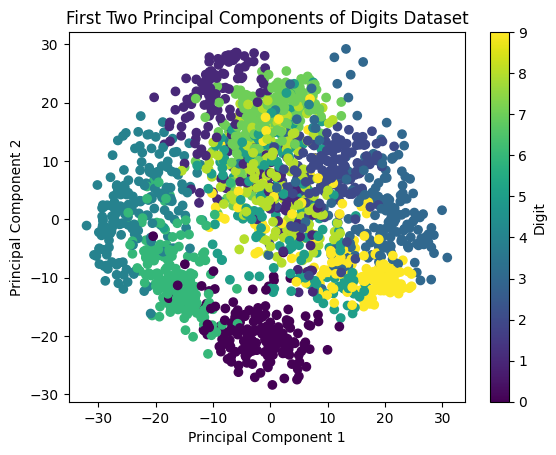

In [ ]:
digits = load_digits()
plt.scatter(newbasis[:, 0], newbasis[:, 1], c=digits.target, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First Two Principal Components of Digits Dataset')
plt.colorbar(label='Digit')
plt.show()


### Q6. [Bonus] Plot the reconstructed data for the first 10 images and compare the reconstructed data with the original data. Comment on the quality of the reconstructed images. 

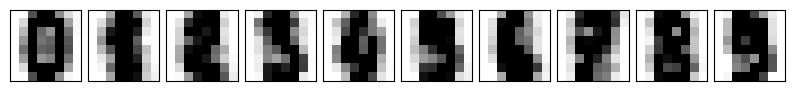

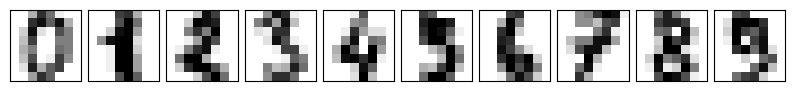

In [ ]:
reconstructed=reconstruct_data(meanX,k)
def plot_digits2(data):
    fig, axes = plt.subplots(1, 10, figsize=(10, 1), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
        if(i==62):
            break
plot_digits2(reconstructed)
plot_digits2(X)
#The Quality is decreasing and the interpretability of the data increases and the loss of data minimises.. 